# **CAIMAN pipeline CNMF-E for miniscope data**

**colab_pipeline_cnmfE_V6.ipynb**

**Version: 0.4**

**caiman v.1.8.9**

This Colab Notebook is based on the script demo_pipeline_cnmfE.ipnb (available on caiman github) and has been designed to analyze one photon miniscope V3, calcium imaging directly on the cloud. It relies on a google drive, CaImAn, which itself uses NormCorre for motion correction as well as Constrained Non-Negative Matrix Factorization (CNMF/CNMFE) for source extraction.

Contact: george@neuro.ufrn.br

# Access to GoogleDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls $path_to_analyze

# Get informations about the virtual machine being used

In [ ]:
# Disk information
#df -h
# CPU information
#lscpu | grep "MHz"
# If using a GPU
#!nvidia-smi -L
#!nvcc --version
# Memory information
#!cat /proc/meminfo | grep 'MemAvailable'

In [ ]:
!pip install imageio==2.5


# Install CAIMAN...

In [ ]:
%%capture --no-stderr
#%%capture [--no-stderr] [--no-stdout] [--no-display] [output]  # just for reference...

# Clone CaImAn from Github
!git clone https://github.com/flatironinstitute/CaImAn.git

!pip install h5py==2.10.0

# Install relevant packages
%cd /content/CaImAn
!pip install -r requirements.txt

# Install CaImAn package
!ip install -e .

#!git checkout e695785
# Install CaImAn manager for relevant datasets
!python caimanmanager.py install --inplace

!pip install -q moviepy
!apt install imagemagick
#!pip install imageio==2.5


In [2]:
pip install -q moviepy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install h5py==2.10.0


In [2]:
pip install imageio_download_bin ffmpeg

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imageio_download_bin (from versions: none)
ERROR: No matching distribution found for imageio_download_bin


# Pré Trauma

# ... and import dependencies

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\AetherCheeta\AppData\Local\Temp\ipykernel_3600\2131185450.py:20: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('load_ext autoreload')
C:\Users\AetherCheeta\AppData\Local\Temp\ipykernel_3600\2131185450.py:21: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('autoreload 2')


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
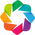

In [4]:
# some imports
import cv2
import glob
import logging
import matplotlib.pyplot as plt
import numpy as np
import imageio
from IPython.display import HTML
from base64 import b64encode
import os
try:
    cv2.setNumThreads(0)
except:
    pass

try:
    if __IPYTHON__:
        # this is used for debugging purposes only. allows to reload classes
        # when changed
        get_ipython().magic('load_ext autoreload')
        get_ipython().magic('autoreload 2')
except NameError:
    pass

import caiman as cm
#from caiman.motion_correction import MotionCorrect
from caiman.motion_correction import motion_correct_oneP_rigid, motion_correct_oneP_nonrigid, MotionCorrect
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour,nb_inspect_correlation_pnr
from caiman.utils import visualization
from caiman.summary_images import local_correlations_movie_offline
from scipy.ndimage import center_of_mass
from IPython.display import display, clear_output
import re
import time
#from moviepy.editor import VideoFileClip, concatenate_videoclips,clips_array,ipython_display
import matplotlib.pyplot as plt
import matplotlib as mpl
import psutil

mpl.style.use('default')
from datetime import datetime
import shutil
from scipy import ndimage

import bokeh.plotting as bpl
bpl.output_notebook()

import holoviews as hv
from holoviews import opts
hv.notebook_extension('bokeh')
#hv.extension('bokeh')

# (step #1) --> Set some experiment parameters


In [6]:
path_to_analyze = r'D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma'
folder_to_results = "Results"    # Where to save the data
spatial_downsample_ratio  = 1/2
temporal_downsample_ratio = 1    # max 1
frame_rate=10                    # if the decay time (half time) is 0.4s, then for frame_rate=20 means 4 frames of information (half)
decay_time = 0.4                 # length of a typical transient in seconds

save_hdf5 = True                      # To save the results in hdf5 format
save_mat  = True                      # To save the resuts im matlab format
save_motion_corrected_file = True     # To save the corrected movie file --> motion_corrected.avi (may need for mesmerize)
remove_background = True              # To remove the background florescence of the videos
#alert_gmail = '' # You can leave your Gmail adress to be notified when your analysis is done
#alert_gmail_password = '' # Password to your Gmail account

print('path_to_analyze:  ',path_to_analyze)
print('Parameters saved. Ready to start analyzing')
#!ls $path_to_analyze

path_to_analyze:   D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma
Parameters saved. Ready to start analyzing


In [7]:
def plot_results(cnm_obj, num_traces = 10, time_int=0.5, indexes=None):
  if indexes is None:
    indexes = cnm_obj.estimates.idx_components
  indexes = np.random.permutation(indexes)[:num_traces]
  masks = np.reshape(cnm_obj.estimates.A.toarray(),cnm_obj.estimates.dims+(-1,), order='F')#.transpose([2,0,1])
  masks = masks[indexes]

  C = cnm_obj.estimates.C[indexes]
  traces = C + cnm_obj.estimates.YrA[indexes]


  for i in range(masks.shape[0]):
    # fig, axs = plt.subplots(1,2,figsize=(16,6))
    fig = plt.figure(constrained_layout=True,figsize=(16,6))
    gs = fig.add_gridspec(1, 3)
    ax1 = fig.add_subplot(gs[:1])
    ax2 = fig.add_subplot(gs[1:])
    ax1.imshow(masks[i])
    plt.axis('off')
    ax2.plot(traces[i], label='traces')
    ax2.plot(C[i], label='denoised')
    display(fig)
    clear_output(wait=True)
    plt.pause(time_int)



### Set up logger (optional)
You can log to a file using the filename parameter, or make the output more or less verbose by setting level to `logging.DEBUG`, `logging.INFO`, `logging.WARNING`, or `logging.ERROR`. A filename argument can also be passed to store the log file

In [8]:
logging.basicConfig(format= "%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s",
                    # filename="/tmp/caiman.log",
                    level=logging.WARNING)

# Get information from the experiment
This is particularily important to register the date/time and name of the experiment, which are also use to create specific analysis folders containing all the analyzed data (calcium imaging and behavior). Additionnaly, timestamps are retrieved and allow to realign calcium imaging with behavior videos

In [10]:
now = datetime.now()
analysis_time = now.strftime("%Y-%m-%d %H:%M") # This is to register when the analysis was performed
print('Analysis started on ' + analysis_time)

analysis_start = time.time() # This is to register the time spent analyzing

path_to_results  = path_to_analyze+'/' + folder_to_results + '/'

#dirResults = path_to_analyze + folder_to_results
#print('Name of the folder for the result: ' + dirResults)
try:
    # Create target Directory
    os.mkdir(path_to_results)
    print("Directory " , path_to_results ,  " Created")
except FileExistsError:
    print("Directory " , path_to_results ,  " already exists")

Analysis started on 2025-08-01 15:50
Directory  D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/  Created


## Extract the date/time of the experiment and save as a timestamp variable
The date/time values are extracted from the automatic DAQ folder organization (might not work if you renamed your folders)

In [11]:
try:
  splitname = str.split(path_to_analyze, '/')

  dateStrPart = splitname[-3]
  timeStrPart = splitname[-2]
  #aasd=str.s
  date_result = str.split(dateStrPart, '_')
  month = int(date_result[0])
  day = int(date_result[1])
  year = int(date_result[2])

  timeStrPart = re.sub('[HSM]','', timeStrPart)
  time_result = str.split(timeStrPart,'_')

  hour = int(time_result[0])
  minute = int(time_result[1])
  seconds = int(time_result[2])

  experiment_timestamp = datetime.timestamp(datetime(year,month,day,hour,minute,seconds))
  #dateNum = date.toordinal(date(year,month,day,hour,minute,seconds))

except:
  print('Could not retrieve date information')

Could not retrieve date information


# Access Google Drive and download miniscope video files

##(step #2)  -->  adjust=True

##(step #5)  -->  adjust=False

In [12]:
adjust=True

sessionFilesResponse = os.listdir(path_to_analyze)
filesList = []
msFileList = []
datFileList = []

for file in sessionFilesResponse:
  filesList.append(file)

for i in filesList[:]:
  if i.startswith('ms') and i.endswith('.avi'):
    msFileList.append(i)
  if i.endswith('.dat'):
    datFileList.append(i)

msFileList = sorted(msFileList, key=lambda x: int(re.sub('[msCam.avi]','', x)))

if adjust:
  msFileList = msFileList[0:20]

print('Miniscope files in folder:')
print(msFileList)
msLocalFileList = [path_to_results + s for s in msFileList]

if len(msFileList) == 0:
  print("No miniscope avi files found")

Miniscope files in folder:
['msCam1.avi', 'msCam2.avi', 'msCam3.avi', 'msCam4.avi', 'msCam5.avi', 'msCam6.avi', 'msCam7.avi', 'msCam8.avi', 'msCam9.avi', 'msCam10.avi', 'msCam11.avi', 'msCam12.avi', 'msCam13.avi', 'msCam14.avi']


## Copy miniscope videos for analysis

In [13]:
sessionFilesResponse = os.listdir(path_to_analyze)
filesList = []
msFileList = []
datFileList = []

for file in sessionFilesResponse:
  filesList.append(file)

for i in filesList[:]:
  if i.startswith('ms') and i.endswith('.avi'):
    msFileList.append(i)
  if i.endswith('.dat'):
    datFileList.append(i)

msFileList = sorted(msFileList, key=lambda x: int(re.sub('[msCam.avi]','', x)))

if adjust:
  msFileList = msFileList[0:20]

print('Miniscope files in folder:')
print(msFileList)
msLocalFileList = [path_to_results + s for s in msFileList]

if len(msFileList) == 0:
  print("No miniscope avi files found")

  for fname in msFileList:
    src = os.path.join(path_to_analyze, fname)
    dst = os.path.join(path_to_results, fname)
    shutil.copyfile(src, dst)
    print('file ' + fname + ' copyed for analysis')

for fname in datFileList:
    src = os.path.join(path_to_analyze, fname)
    dst = os.path.join(path_to_results, fname)
    shutil.copyfile(src, dst)
    print('file ' + fname + ' copyed for analysis')

# Create a list of files downloaded on the virtual machine
msLocalFileList = [path_to_results + s for s in msFileList]
fnames = msLocalFileList

print('Files copyed for analysis:')
print(msFileList)
print(datFileList)

Miniscope files in folder:
['msCam1.avi', 'msCam2.avi', 'msCam3.avi', 'msCam4.avi', 'msCam5.avi', 'msCam6.avi', 'msCam7.avi', 'msCam8.avi', 'msCam9.avi', 'msCam10.avi', 'msCam11.avi', 'msCam12.avi', 'msCam13.avi', 'msCam14.avi']
Files copyed for analysis:
['msCam1.avi', 'msCam2.avi', 'msCam3.avi', 'msCam4.avi', 'msCam5.avi', 'msCam6.avi', 'msCam7.avi', 'msCam8.avi', 'msCam9.avi', 'msCam10.avi', 'msCam11.avi', 'msCam12.avi', 'msCam13.avi', 'msCam14.avi']
[]


In [14]:
for fname in msFileList:
    src = os.path.join(path_to_analyze, fname)
    dst = os.path.join(path_to_results, fname)
    shutil.copyfile(src, dst)
    print('file ' + fname + ' copyed for analysis')

for fname in datFileList:
    src = os.path.join(path_to_analyze, fname)
    dst = os.path.join(path_to_results, fname)
    shutil.copyfile(src, dst)
    print('file ' + fname + ' copyed for analysis')

# Create a list of files downloaded on the virtual machine
msLocalFileList = [path_to_results + s for s in msFileList]
fnames = msLocalFileList

print('Files copyed for analysis:')
print(msFileList)
print(datFileList)

file msCam1.avi copyed for analysis
file msCam2.avi copyed for analysis
file msCam3.avi copyed for analysis
file msCam4.avi copyed for analysis
file msCam5.avi copyed for analysis
file msCam6.avi copyed for analysis
file msCam7.avi copyed for analysis
file msCam8.avi copyed for analysis
file msCam9.avi copyed for analysis
file msCam10.avi copyed for analysis
file msCam11.avi copyed for analysis
file msCam12.avi copyed for analysis
file msCam13.avi copyed for analysis
file msCam14.avi copyed for analysis
Files copyed for analysis:
['msCam1.avi', 'msCam2.avi', 'msCam3.avi', 'msCam4.avi', 'msCam5.avi', 'msCam6.avi', 'msCam7.avi', 'msCam8.avi', 'msCam9.avi', 'msCam10.avi', 'msCam11.avi', 'msCam12.avi', 'msCam13.avi', 'msCam14.avi']
[]


## Downsample (spatial and temporal) miniscope videos for analysis

In [15]:
info=True
for fname in msLocalFileList:
    msCam = cm.load(fname)
    msCam_resized=msCam.resize(spatial_downsample_ratio, spatial_downsample_ratio,temporal_downsample_ratio)
    msCam_resized.save(fname)
    if info==True:
        info=False
        print('msCam_original:' + str(msCam.shape))
        print('msCam_resized: ' + str(msCam_resized.shape))
    print(fname + ' --> resized')
#clip1 = VideoFileClip(msLocalFileList[0])
#ipython_display(clip1,width=400)
clip1_name=path_to_results + "clip1.avi"
msCam_resized.save(clip1_name)

msCam_original:(1000, 480, 752)
msCam_resized: (1000, 240, 376)
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam1.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam2.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam3.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam4.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam5.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam6.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam7.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam8.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam9.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/msCam10.avi --> resized
D:/Master_Gabriel/Progaming/Calciumdata/Anima

'D:/Master_Gabriel/Progaming/Calciumdata/Animal1/Pretrauma/Results/clip1.avi'

In [16]:
if remove_background:
  msCam_min=[]
  for fname in msLocalFileList:
    msCam = cm.load(fname)          #pick one video
    msCam_min.append(msCam.min(0))  #store the minimum intensity pixels over the time in a frame
  tmp=np.array(msCam_min)
  template_min=tmp.min(0)             #find the minimum intensity over all frames
  template_min2= 0.6*ndimage.uniform_filter(template_min, size=4)

  for fname in msLocalFileList:
    msCam = cm.load(fname)          #pick one video
    msCam = msCam-template_min2

    msCam.save(fname)
#  video=cm.concatenate([msCam_resized,msCam], axis=2).play(fr=60, q_max=99.5, magnification=1)
  clip2_name=path_to_results + "clip2.avi"
  msCam.save(clip2_name)

## Play the movies (optional)
Play the movie (optional). This will require loading the movie in memory which in general is not needed by the pipeline.

In [ ]:
clip1 = VideoFileClip(clip1_name).margin(1)
if remove_background:
  clip2 = VideoFileClip(clip2_name).margin(1)
  final_clip = clips_array([[clip1,clip2]])
  clip_width=800
else:
  final_clip = clip1
  clip_width=400
ipython_display(final_clip,width=clip_width)

## Check if the video has been resized (optional)

In [ ]:
# Make sure the video has been resized
clip = VideoFileClip(msLocalFileList[0])
clip.save_frame(path_to_results + 'downsampled_frame.png')

img=mpl.image.imread(path_to_results + 'downsampled_frame.png')
imgplot = plt.imshow(img); plt.title('Downsampled size')

In [17]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=128, single_thread=False)

     1418351 [cluster.py:       setup_cluster():225] [3600] The local backend is an alias for the multiprocessing backend, and the alias may be removed in some future version of Caiman
Exception in thread Thread-8 (_handle_workers):
Traceback (most recent call last):
  File "d:\Anaconda\envs\caiman\lib\threading.py", line 1016, in _bootstrap_inner


    self.run()
  File "d:\Anaconda\envs\caiman\lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "d:\Anaconda\envs\caiman\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Anaconda\envs\caiman\lib\multiprocessing\pool.py", line 522, in _handle_workers
    cls._wait_for_updates(current_sentinels, change_notifier)
  File "d:\Anaconda\envs\caiman\lib\multiprocessing\pool.py", line 502, in _wait_for_updates
    wait(sentinels, timeout=timeout)
  File "d:\Anaconda\envs\caiman\lib\multiprocessing\connection.py", line 879, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "d:\Anaconda\envs\caiman\lib\multiprocessing\connection.py", line 811, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 130


# Set parameters for motion correction
Ideally, optimize these for your datasets then stick to these values

In [ ]:
# dataset dependent parameters
frate = frame_rate*temporal_downsample_ratio                       # movie frame rate
decay_time = decay_time                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (3, 3)       # size of high pass spatial filtering, used in 1p data
max_shifts = (4, 4)      # maximum allowed rigid shift
strides = (48, 48)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (36, 36)      # overlap between patches (size of patch strides+overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries
use_cuda = False         # Set to True in order to use GPU
only_init_patch = True
memory_fact = 0.8

mc_dict = {
    'fnames': fnames,
    'fr': frate,
    'niter_rig': 1,
    'splits_rig': 20,  # for parallelization split the movies in  num_splits chuncks across time
    # if none all the splits are processed and the movie is saved
    'num_splits_to_process_rig': None, # intervals at which patches are laid out for motion correction
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan,
    'use_cuda' : use_cuda,
    'only_init_patch' : only_init_patch,
    'memory_fact': memory_fact
}

opts = params.CNMFParams(params_dict=mc_dict)

     1432948 [params.py:       change_params():1166] [3600] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)
     1432949 [params.py:       change_params():1172] [3600] In setting CNMFParams, provided toplevel key only_init_patch was unused. This is a bug!


## Perform motion correction (might take a while)

In [ ]:

# Reduce the size of the data by downsampling
spatial_downsample_ratio = 0.5
temporal_downsample_ratio = 0.5
data=[]
# Perform downsampling on the data
#downsampled_data = data[::temporal_downsample_ratio, ::spatial_downsample_ratio, ::spatial_downsample_ratio]


start = time.time() # This is to keep track of how long the analysis is running
if motion_correct:
    # do motion correction rigid
    mc = MotionCorrect(fnames, dview=dview, **opts.get_group('motion'))
    mc.motion_correct(save_movie=True)
    fname_mc = mc.fname_tot_els if pw_rigid else mc.fname_tot_rig
    if save_motion_corrected_file:
      mc_name='motion_corrected.avi'
      motion_corrected=cm.load(fname_mc)
      motion_corrected.save(path_to_results + mc_name)
      print(motion_corrected.shape)
      print('The ' + mc_name + ' file has '+ str( int((motion_corrected.nbytes)/(1024*1024))) + ' Mb')
end = time.time()
print('Motion correction has been done in ' + str(int(end - start)) + ' seconds!')



     1450940 [motion_correction.py:            __init__():205] [3600] cuda is no longer supported; this kwarg will be removed in a future version of caiman
     1451257 [movies.py:      extract_shifts():242] [3600] Movie average is negative. Removing 1st percentile.
     1451261 [movies.py:      extract_shifts():260] [3600] Movie average is negative. Removing 1st percentile.
     1451399 [movies.py:      extract_shifts():242] [3600] Movie average is negative. Removing 1st percentile.
     1451403 [movies.py:      extract_shifts():260] [3600] Movie average is negative. Removing 1st percentile.
     1451539 [movies.py:      extract_shifts():242] [3600] Movie average is negative. Removing 1st percentile.
     1451543 [movies.py:      extract_shifts():260] [3600] Movie average is negative. Removing 1st percentile.


## If motion corrected data exists, use this cell


In [ ]:
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)

sessionFilesResponse = os.listdir(r'C:/Users/IC/Documents/PythonCampScript/pretraumaResults')
Dirpaht= r'C:/Users/IC/Documents/PythonCampScript/pretraumaResults'

filesList = []
fname_new = []

for file in sessionFilesResponse:
  filesList.append(file)

for i in filesList[:]:
  if i.startswith('memmap__'):
    fname_new=i

fname_new= Dirpaht  + '/' + fname_new
print(fname_new)

bord_px=0

In [ ]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

In [ ]:
np.shape(images)

## Plot the motion corrected template and associated shifts

In [ ]:
%matplotlib inline
if motion_correct and not pw_rigid:
  plt.figure(figsize=(20,10))
  plt.subplot(2, 1, 1)
  plt.title('Filtered template')
  plt.imshow(mc.total_template_rig);  # % plot template
  plt.subplot(2, 1, 2)
  plt.title('Estimated shifts')
  plt.plot(mc.shifts_rig)  # % plot rigid shifts
  plt.legend(['x shifts', 'y shifts'])
  plt.xlabel('frames')
  plt.ylabel('pixels')




## Map the motion corrected video to memory

In [ ]:
if motion_correct:
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mc.x_shifts_els)),
                                     np.max(np.abs(mc.y_shifts_els)))).astype(np.int)
    else:
        bord_px = np.ceil(np.max(np.abs(mc.shifts_rig))).astype(np.int)

    bord_px = 0 if border_nan is 'copy' else bord_px
    fname_new = cm.save_memmap(fname_mc, base_name='memmap_', order='C', border_to_0=bord_px)

else:  # if no motion correction just memory map the file
    fname_new = cm.save_memmap(fnames, base_name='memmap_', order='C', border_to_0=0, dview=dview)

print('Motion corrected video has been mapped to memory')

In [ ]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)


sessionFilesResponse = os.listdir(path_to_results)
filesList = []
fname_new = []

for file in sessionFilesResponse:
  filesList.append(file)

for i in filesList[:]:
  if i.startswith('memmap__'):
    fname_new=i

fname_new=path_to_results + fname_new
print(fname_new)

bord_px=0


In [ ]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

In [ ]:
plt.imshow(images[:][::,55:295:])

In [ ]:
images=np.array([])
for i in range(len(imagest)):
    images=np.append(images,imagest[i][::,55:295:])
plt.imshow(images[0])

In [ ]:
#downsample_factor=int(images[::].shape[0]/500)
#print(downsample_factor)
#plt.imshow(images[::downsample_factor])

# Inspect summary images and find parameters

Check the optimal values of min_corr and min_pnr by looking the histogram in the figure that pops up. You can modify them in the params object. Note that computing the correlation pnr image can be computationally and memory demanding for large datasets. In this case you can compute only on a subset of the data and was set for 500 frames. This will compute the correlation pnr image


## (step #3) --> Optimize the parameter "gausean_width" (ussually around 3.0)

In [ ]:
hv.extension('bokeh')

# going to use show() to open plot in browser
from bokeh.plotting import show

In [ ]:
#%%capture
%env HV_DOC_HTML=True
# compute some summary images (correlation and peak to noise)

gausean_width = 3.0     #gSig... specifies a gausean 2D width for approximating a neuron

hv.extension('bokeh')
downsample_factor=int(images[::].shape[0]/500)
cn_filter, pnr = cm.summary_images.correlation_pnr(images[::downsample_factor], gSig=gausean_width, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
nb_inspect_correlation_pnr(cn_filter, pnr)
show(hv.render(nb_inspect_correlation_pnr(cn_filter, pnr)))
print(cn_filter.mean())

## (step #4) --> Optimize the parameters "min_corr and min_pnr"

In [ ]:
# Now sert the parameters
min_corr=0.6 # min correlation of peak (from correlation image)
min_pnr =6.5  # min peak to noise ratio

## Parameter setting for CNMF-E
We now define some parameters for the source extraction step using the CNMF-E algorithm.
We construct a new dictionary and use this to modify the *existing* `params` object,

In [ ]:
# dataset dependent parameters
# frate = 10 # movie frame rate
decay_time = decay_time  # length of a typical transient in seconds
fnames=fnames
# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = gSig_filt    # size of high pass spatial filtering, used in 1p data
max_shifts = max_shifts  # maximum allowed rigid shift
strides = strides       # start a new patch for pw-rigid motion correction every x pixels
overlaps = overlaps      # overlap between pathes (size of patch strides+overlaps)
max_deviation_rigid = max_deviation_rigid  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': fnames,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

opts = params.CNMFParams(params_dict=mc_dict)

In [ ]:
%%capture
# parameters for source extraction and deconvolution
av_diameter=4*gausean_width+1
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None
gSig = (gausean_width, gausean_width)       # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = (av_diameter, av_diameter)     # average diameter of a neuron, in general 4*gSig+1
Ain = None          # possibility to seed with predetermined binary masks
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels
#                     (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
tsub = 2            # downsampling factor in time for initialization,
#                     increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization,
#                     increase if you have memory problems
#                     you can pass them here as boolean vectors
low_rank_background = None  # None leaves background of each patch intact,
#                     True performs global low-rank approximation if gnb>0
gnb = 0             # number of background components (rank) if positive,
#                     else exact ring model with following settings
#                         gnb= 0: Return background as b and W
#                         gnb=-1: Return full rank background B
#                         gnb<-1: Don't return background
nb_patch = 0        # number of background components (rank) per patch if gnb>0,
#                     else it is set automatically
min_corr = min_corr       # min peak value from correlation image
min_pnr  = min_pnr       # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

opts.change_params(params_dict={'method_init': 'corr_pnr',  # use 'corr_pnr' for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # leave as is for 1 photon
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px})                # number of pixels to not consider in the borders)

In [ ]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)

# Perform CNMFe extraction
This will take a while. Coffee time!

In [ ]:
#%%capture
start = time.time()
cnm = cnmf.CNMF(n_processes=n_processes, dview=dview, Ain=Ain, params=opts)
cnm.fit(images)
end = time.time()
TotalTime=(end-start)/60

print(f'CNMFe has been done in {TotalTime}   minutes!')

## Component Evaluation

The processing in patches creates several spurious components. These are filtered out by evaluating each component using three different criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

After setting some parameters we again modify the existing `params` object.

## (step #6) --> Optimize the parameters min_SNR and r_values_min

In [ ]:
ls /root/caiman_data/model

In [ ]:
#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

min_SNR = 3.0            # adaptive way to set threshold on the transient size
r_values_min = 0.80   # threshold on space consistency (if you lower more components
#                        will be accepted, potentially with worst quality)
cnm.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': r_values_min,
                           'use_cnn': False})
cnm.estimates.evaluate_components(images, cnm.params, dview=dview)

print(' ***** ')
print('Number of total components: ', len(cnm.estimates.C))
print('Number of accepted components: ', len(cnm.estimates.idx_components))

In [ ]:
%matplotlib inline

#How many neurons to plot
neuronsToPlot = 150

DeconvTraces = cnm.estimates.S     #
RawTraces = cnm.estimates.C        #denoised component
SFP1 = cnm.estimates.A
SFP = cnm.estimates.A

SFP_dims = list(dims)
SFP_dims.append(SFP.shape[1])
print('Spatial foootprints dimensions (height x width x neurons): ' + str(SFP_dims))

#numNeurons = SFP_dims[2]
idx_good=cnm.estimates.idx_components
numNeurons = len(idx_good)

SFP = np.reshape(SFP.toarray(), SFP_dims, order='F')

maxRawTraces = np.amax(RawTraces)

plt.figure(figsize=(30,15))
plt.subplot(3,2,1); plt.imshow(cn_filter); plt.colorbar(); plt.title('Correlation projection')
plt.subplot(3,2,3); plt.imshow(pnr); plt.colorbar(); plt.title('PNR')
plt.subplot(3,2,5); plt.imshow(np.amax(SFP,axis=2)); plt.colorbar(); plt.title('Spatial footprints')

plt.subplot(2,2,2); plt.title('Example traces (first '+str(neuronsToPlot) + ' cells). Found '+str(numNeurons)+' neurons')

plot_gain = 5 # To change the value gain of traces
if numNeurons >= neuronsToPlot:
  for i in range(neuronsToPlot):
    if i == 0:
      plt.plot(RawTraces[idx_good[i],:],'k')
    else:
      trace = RawTraces[idx_good[i],:] + maxRawTraces*i/plot_gain
      plt.plot(trace,'k')
else:
  for i in range(numNeurons):
    if i == 0:
      plt.plot(RawTraces[idx_good[i],:],'k')
    else:
      trace = RawTraces[idx_good[i],:] + maxRawTraces*i/plot_gain
      plt.plot(trace,'k')
#plt.subplots_adjust(top=1.02, bottom=0.00, left=0.0, right=0.5, hspace=0.25, wspace=0.35)
plt.show

plt.subplot(2,2,4); plt.figure; plt.title('Deconvolved traces (first '+str(neuronsToPlot) + ' cells). Found '+str(numNeurons)+' neurons')
plot_gain = 20 # To change the value gain of traces
if numNeurons >= neuronsToPlot:
  for i in range(neuronsToPlot):
    if i == 0:
      plt.plot(DeconvTraces[idx_good[i],:],'k')
    else:
      trace = DeconvTraces[idx_good[i],:] + maxRawTraces*i/plot_gain
      plt.plot(trace,'k')
else:
  for i in range(numNeurons):
    if i == 0:
      plt.plot(DeconvTraces[idx_good[i],:],'k')
    else:
      trace = DeconvTraces[idx_good[i],:] + maxRawTraces*i/plot_gain
      plt.plot(trace,'k')

# Save summary figure
plt.savefig(path_to_results + '/' + 'summary_figure.svg', edgecolor='w', format='svg', transparent=True)
plt.savefig(path_to_results + '/' + 'summary_figure.jpg', edgecolor='w', format='jpg', transparent=True)
#print(path_to_results)
plt.imsave(path_to_results+'/PnrResult.jpg',arr=pnr)
#imgpnr=plt.imread(pnr)
plt.show()
plt.imshow(pnr)


In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(20, 10), constrained_layout=True)
cont = 10
x = np.linspace(0,1,len(RawTraces[0]))
if cont<150:

    for ax, index in zip(axs.flat, idx_good):
        ax.set_title(f'ID={index}')
        ax.plot(x, cnm.estimates.C[cont], lw=0.9)
        cont +=1

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(20, 10), constrained_layout=True)
cont = 10
x = np.linspace(0,1,len(RawTraces[0]))
if cont<100:

    for ax, index in zip(axs.flat, idx_good):
        ax.set_title(f'ID={index}')
        ax.plot(x, cnm.estimates.C[cont], lw=0.9)
        cont +=1

In [ ]:
len(cnm.estimates.S)

In [ ]:
#display(cnm.estimates.C)
print(np.shape(RawTraces))

fig,ax = plt.subplots(1,1)
ax.set_xlim(0,1)
ax.plot(np.linspace(0,1,10999+1),RawTraces[58])




In [ ]:
np.shape(cn_filter)

In [ ]:
print(np.shape(Yr))

## Accepted components

In [ ]:
# accepted components
cnm.estimates.nb_view_components(images,img=pnr,
                                denoised_color='red', cmap='viridis',thr=0.99)     # try cmap='viridis' or cmap='gray'



## Rejected components

In [ ]:
# rejected components
cnm.estimates.nb_view_components(img=cn_filter, idx=cnm.estimates.idx_components_bad,
                                denoised_color='red', cmap='viridis',thr=0.9)





In [ ]:
pip install sciscripts

In [ ]:
SpatialFt=cnm.estimates.A
import scipy.sparse
nonzero_indices = scipy.sparse.find(SpatialFt)
row, col, _ = nonzero_indices

# Plot the locations of the neurons in the image
plt.hexbin(row,col)
plt.show()

In [ ]:
print(SpatialFt)

In [ ]:
Yr1=np.reshape(images,((120, 756)))

In [ ]:
from caiman.utils import visualization

In [ ]:
print(np.shape(CellsCoordinates))

In [ ]:
print(CellsCoordinates[1])


In [ ]:
print(len(CellsCoordinates))

In [ ]:
print(len(idx0_coord[:,0]))

In [ ]:
x = globals()[f'idx{259}_coord'][1,0]
print(x)


In [ ]:
#%% Extract DF/F values
cnm.estimates.detrend_df_f(detrend_only=True,frames_window=250)

In [ ]:
cm.stop_server(dview=dview)

In [ ]:
print(path_to_results)

# Save the results in HDF5 format

In [ ]:
#savec=path_to_results + 'analysis_results.csv'
#print(savec)
if save_hdf5:
    cnm.save('analysis_results_pre.hdf5')
    print('analysis_results_pre.hdf5 saved')


# Save the results in Matlab format

In [ ]:
if save_mat:
    from scipy.io import savemat

    results_dict = {
                    'dirName': path_to_analyze,
                    'numFiles': len(msFileList),
                    'framesNum': len(RawTraces[1]),
                    'maxFramesPerFile': 1000,
                    'height': dims[0],
                    'width': dims[1],
    #                'Experiment': experimentName,
     #               'ExperimentTimestamp': experiment_timestamp,
                    'camNumber': 0,
     #               'time': mstime,
    #                'analysis_time': analysis_time,
                    'ds': spatial_downsample_ratio,
    #                'shifts': mc.shifts_rig,
                    'meanFrame': [], #TO DO
                    'Centroids': [], #TO DO
                    'CorrProj': cn_filter,
                    'PeakToNoiseProj': pnr,
                    'FiltTraces': [], #TO DO
                    'RawTraces': RawTraces.conj().transpose(), #swap time x neurons dimensions
                    'SFP': SFP,
                    'DeconvTraces':DeconvTraces,
                    'numNeurons': SFP_dims[2],
    #                'analysis_duration': analysis_duration
                    }

    SFPperm = np.transpose(SFP,[2,0,1])
    savemat(path_to_results + 'SFP.mat', {'SFP': SFPperm})
    savemat(path_to_results + 'ms.mat', {'ms': results_dict})
    print('SFP.mat saved')
    print('ms.mat  saved')



# Checking if the Cell are the same in different Sessions

In [ ]:
f,axarr = plt.subplots(1, 2,figsize=(20,10))
#plt.imsave(Dirpaht+'/PnrResult.jpg')
img1=plt.imread('C:/Users/IC/Documents/PythonCampScript/pretraumaResults/prePnrResult.jpg')
img2=plt.imread('C:/Users/IC/Documents/PythonCampScript/postraumaResults/posPnrResult.jpg')
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [ ]:
print('Good Neurons Index: \n',idx_good)#cnm.estimates.idx_components

In [ ]:
nome_do_arquivo_hdf5 = r'C:/Users/IC\Documents/PythonCampScript/postraumaResults/analysis_results1.hdf5'
with h5py.File(nome_do_arquivo_hdf5, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    #     # Get the data
    data = list(f[a_group_key])
    display(data)
    f=h5py.File(nome_do_arquivo_hdf5,'r')
print(f['estimates'].keys())
idx=(f['estimates']['S'][8])#get the deconv  S trace ALL
#(f['estimates']['C'])#get the Raw trace ALL
lp=f['estimates']['A']#get the Neuronposi trace ALL

#xca=np.linspace(0,12,len(idx))
#plt.plot(xca,lp)
print(lp)

In [ ]:
print(f['estimates'][])

# Checking

In [ ]:

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(np.shape(gray1))

In [ ]:
lp=(cnm.estimates.A)
print(np.shape(lp),'\n',lp)
Est=lp#cnm.estimates.A
Dimensions = (np.shape(gray2))#images
CenterOfMass = np.array([_['CoM'] for _ in visualization.get_contours(Est, Dimensions)])
CellsCoordinates = [_['coordinates'] for _ in visualization.get_contours(Est, Dimensions)]


In [ ]:
for index in range(len(cnm.estimates.C)):#cnm.estimates.C
    globals()[f'idx{index}_coord'] = CellsCoordinates[index]
idx0_coord.shape

In [ ]:
#lo=int(input('Index a se analizar: '))

#fig,ax = plt.subplots(1,2,figsize=(20,9))

#ax[1].set_xlim(0,1)
for lo in cnm.estimates.idx_components[::10]:
    for j in range(len(globals()[f'idx{lo}_coord'][:,0])):
        x = globals()[f'idx{lo}_coord'][j,0]
        y = globals()[f'idx{lo}_coord'][j,1]
        plt.scatter(x = x,y=y,s= 0.8, c='r')
        plt.scatter(cluster1_centers[:, 0], cluster1_centers[:, 1],alpha = 0.4 )
        plt.imshow(threshold2)
        plt.title(f'Neuron Index:{lo}')
    plt.show()
    plt.plot(np.linspace(0,2,11000),cnm.estimates.C[lo],linewidth=0.8)
    plt.title(f'Raw trace Index:{lo}')


In [ ]:
plt.imshow(gray2)
plt.colorbar()

In [ ]:
#fig, axs = plt.subplots(5, 2, figsize=(20, 10), constrained_layout=True)
for index in cnm.estimates.idx_components[0:200:5] :
    for j in range(len(globals()[f'idx{index}_coord'][:,0])):
        x = globals()[f'idx{index}_coord'][j,0]
        y = globals()[f'idx{index}_coord'][j,1]
        plt.scatter(x = x,y=y,s= 0.8, c='r')
        plt.imshow(gray1)
    plt.show()

In [ ]:



imgc2=gray2[::,55:295:]
imgc1=gray1[::,55:295:]
#gray2=gray2[::,25:335:]
#gray1=gray1[::,20:330:]
print(np.shape(imgc1))
#    if i >=110
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgc1)
ax[1].imshow(imgc2)
#ax.colorbar()

In [ ]:
_, threshold1 = cv2.threshold(gray1,98, 255, cv2.THRESH_BINARY)
_, threshold2 = cv2.threshold(gray2,90, 255, cv2.THRESH_BINARY)
f,axrr=plt.subplots(1, 2,figsize=(20,10))
axrr[0].imshow(threshold1)
axrr[0].set_title('PreTrauma')
axrr[1].imshow(threshold2)
axrr[1].set_title('PosTrauma')
#plt.savefig("C:/Users/IC/Documents/PythonCampScript/postraumaResults.svg",format="svg")

# check the neuro and his index

In [ ]:

from sklearn.cluster import KMeans
# Definir o número de neurônios
NUM_NEURONS = 90

# Detectar bordas usando Canny
edges1 = cv2.Canny(threshold1, 100, 200)
edges2 = cv2.Canny(threshold2, 100, 200)
#


# Encontrar os contornos das bordas
contours1, hierarchy1 = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Fazer o clustering usando KMeans
cluster1 = KMeans(n_clusters=NUM_NEURONS, random_state=None ).fit(np.array([cnt[0][0] for cnt in contours1]))
cluster2 = KMeans(n_clusters=NUM_NEURONS, random_state=None).fit(np.array([cnt[0][0] for cnt in contours2]))

NeuronsFound1=(len(cluster1.labels_))
NeuronsFound2=(len(cluster2.labels_))
# Criar um dicionário onde cada chave é um neurônio e cada valor é um índice único
#neurons = {}
#for i in range(NUM_NEURONS):
    #neurons[i] = (cluster1.labels_ == i).astype(int) + (cluster2.labels_ == i).astype(int)
# Exibir o dicionário
#print(neurons)

In [ ]:
#import matplotlib.pyplot as plt

# Get the cluster centers
cluster1_centers = cluster1.cluster_centers_
cluster2_centers = cluster2.cluster_centers_

# Plot the results using scatter plot
f,axrrr=plt.subplots(1, 2,figsize=(10,5))
axrrr[0].scatter(cluster1_centers[:, 0], cluster1_centers[:, 1], c='red',alpha = 0.4)

axrrr[1].scatter(cluster2_centers[:, 0], cluster2_centers[:, 1], c='blue',alpha = 0.4)

# Add title and labels to the plot
#plt.xlabel("X")
#plt.ylabel("Y")

# Show the plot
axrrr[0].imshow(threshold1)
axrrr[1].imshow(threshold2)
axrrr[0].set_title('Pretrauma = Cluster X Image ')
#axrrr[0].legend(str(136))
axrrr[1].set_title('Postrauma = Cluster X Image ')
#axrrr[1].legend(str(154))

plt.show()


In [ ]:
plt.imshow(edges1)

In [ ]:
#print(len(cluster2_centers[:,0]))
clidx=np.array([])
xlop=np.array([])
for i in range(len(cluster2_centers[:,0])):
    if (cluster1_centers[i,0]> 50) and (cluster1_centers[i,0]< 320) and (cluster2_centers[i,0]> 50) and (cluster2_centers[i,0]< 320):
        for j in range(len(cluster2_centers[:,0])):
                if ((cluster2_centers[j,0]-cluster1_centers[i,0])<12)  and ((cluster2_centers[j,1]-cluster1_centers[i,1])<12)and ((cluster2_centers[j,0]-cluster1_centers[i,0])>5)  and ((cluster2_centers[j,1]-cluster1_centers[i,1])>0):
                    clidx=np.append(clidx,j)
                    xlop=np.append(xlop,i)
print(clidx,'\n',xlop)

In [ ]:
for i in range(len(cluster2_centers[:,0])):
    if (cluster1_centers[i,0]> 50) and (cluster1_centers[i,0]< 320) and (cluster2_centers[i,0]> 50) and (cluster2_centers[i,0]< 320):
        for j in range(len(cluster2_centers[:,0])):
                if ((cluster2_centers[j,0]-cluster1_centers[i,0])<12)  and ((cluster2_centers[j,1]-cluster1_centers[i,1])<12)and ((cluster2_centers[j,0]-cluster1_centers[i,0])>0)  and ((cluster2_centers[j,1]-cluster1_centers[i,1])>0):
                    print("x:",cluster2_centers[j,0]-cluster1_centers[i,0]  ,"\n y: ", (cluster2_centers[j,1]-cluster1_centers[i,1]),"\n x: ", (cluster2_centers[j,0]-cluster1_centers[i,0]) ,"\n y:", cluster2_centers[j,1]-cluster1_centers[i,1])

In [ ]:
for i in xlop:
    i=int(i)
    for j in clidx:
        j=int(j)
        plt.scatter(cluster1_centers[i,0],cluster1_centers[i,1],c='r')
        plt.scatter(cluster2_centers[j,0],cluster2_centers[j,1],c='g')
        plt.imshow(gray1)

In [ ]:
#[39. 42. 52. 36. 78. 50.  2.]
# [10. 28. 33. 54. 61. 63. 85.]
pog=2
champ=10
plt.scatter(cluster1_centers[pog,0],cluster1_centers[pog,1],c='r')
plt.scatter(cluster2_centers[champ,0],cluster2_centers[champ,1],c='g')
plt.imshow(img1)

In [ ]:
totalv=(len(cluster1_centers))

In [ ]:
cont=0
for i in range(len(cluster1_centers)):
    if (cluster1_centers[i,0]> 50) and (cluster1_centers[i,0]< 320):
        plt.scatter(cluster1_centers[i,0],cluster1_centers[i,1],c='r')
        plt.imshow(img1)
        plt.title(f'img {i}')
        cont+=1
        plt.show()
print(totalv-cont)

In [ ]:
from sciscripts.Analysis.Analysis import PolygonArea
CellsArea = np.array([PolygonArea(_[:], _[:]) for _ in globals()[f'idx{259}_coord']])


In [ ]:
CellsArea = np.array([PolygonArea(_[:], _[:]) for _ in globals()[f'idx{13}_coord']])
print((CellsArea))

In [ ]:
#import the necessary libraries
bestlab1=np.array([])
bestlab2=np.array([])
from sklearn.cluster import SpectralClustering

#Define the data points

#Create the clustering model
clustering = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', assign_labels='discretize')

#Fit the model to the data
clustering.fit(np.concatenate((threshold1, threshold2)))

#Check if the two neurons are the same
print(len(clustering.labels_[:]))
for i in range(len(clustering.labels_[:])):
    for j in range(len(clustering.labels_[:])):
        if clustering.labels_[i] == clustering.labels_[j]:
            #print('The two neurons are the same.')
            bestlab1=np.append(bestlab1,clustering.labels_[i])
            bestlab2=np.append(bestlab2,clustering.labels_[j])
        #else:
            #print('The two neurons are different.')
print(bestlab1,'\n',bestlab2)

In [ ]:
_, threshold1 = cv2.threshold(gray1, 80, 255, cv2.THRESH_BINARY)
_, threshold2 = cv2.threshold(gray2, 80, 255, cv2.THRESH_BINARY)

# Find the contours in each image
contours1, _ = cv2.findContours(threshold1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(threshold2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour in each image
neuron1 = max(contours1, key=cv2.contourArea)
neuron2 = max(contours2, key=cv2.contourArea)

# Find the centroid of each neuron
M1 = cv2.moments(neuron1)
cx1 = int(M1['m10'] / M1['m00'])
cy1 = int(M1['m01'] / M1['m00'])

M2 = cv2.moments(neuron2)
cx2 = int(M2['m10'] / M2['m00'])
cy2 = int(M2['m01'] / M2['m00'])

# Overlay the two images
vis = np.concatenate((gray1, gray2), axis=1)

# Draw a line between the centroids of the neurons
cv2.line(vis, (cx1, cy1), (cx2 + gray1.shape[1], cy2), (0, 0, 255), 2)

# Show the overlayed image
cv2.imshow("Neurons", vis)
cv2.waitKey()

print(cx1,cy1)

In [ ]:
edges1 = cv2.Canny(imgc1, 100, 200)
edges2 = cv2.Canny(imgc2, 100, 200)
f,ax=plt.subplots(1,2)

ax[0].imshow(edges1)
ax[1].imshow(edges2)
#contours2, hierarchy2 = cv2.findContours(edges1[40:], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#print(contours2)

In [ ]:
print((imgc2.max()))#()-(imgc2.min())

In [ ]:
#print(np.shape(contours1[81]))
cimgc1=imgc1.copy()
cimgc1=cv2.drawContours(image=cimgc1, contours=contours1, contourIdx=-1, color=(0, 255, 255), thickness=1)

#print(contours1[0][0][0])
#plt.scatter(contours1[:][:][:][0],contours1[:][:][:][1])
f,ax=plt.subplots(1,2,figsize=(20,10))

ax[0].imshow(imgc1)
ax[1].imshow(cimgc1)

In [ ]:
data=np.concatenate(((threshold1, threshold2)))
# Define the number of clusters
n_clusters = 20

# Create the clustering model
clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', assign_labels='kmeans')

# Fit the model to the data
clustering.fit(data)

# Plot the clustering results
fig, ax = plt.subplots()
for i in range(n_clusters):
    cluster = data[clustering.labels_ == i]
    #ax.set_xlim(0,80)
    #ax.set_ylim(0,80)
    ax.scatter(cluster[:, 0], cluster[:, 1], s=10, label=f'Cluster {i}')
ax.legend()
plt.show()


In [ ]:
import h5py


In [ ]:
File = r'C:/Users/IC/Documents/PythonCampScript/postraumaResults/analysis_results.hdf5'
F = h5py.File(File, 'r')


In [ ]:
Dav=(Tesl['data'])

In [ ]:
Raw
for i in range(len(Dav)):
    d

In [ ]:
Tesl=(F['estimates']['C'])
Est=Tesl=(F['estimates']['A']['data'])

# Post Trauma


## Copy miniscope videos for analysis

In [ ]:
adjust=False
path_to_analyze1='C:/Users/IC/Documents/PythonCampScript/postrauma'
path_to_results1='C:/Users/IC/Documents/PythonCampScript/postraumaResults'

sessionFilesResponse1 = os.listdir(path_to_analyze1)
filesList1 = []
msFileList1 = []
datFileList1 = []

for file in sessionFilesResponse1:
    filesList1.append(file)


for i in filesList1[:]:
    if i.startswith('ms') and i.endswith('.avi'):
        msFileList1.append(i)
    if i.endswith('.dat'):
        datFileList1.append(i)

msFileList1 = sorted(msFileList1, key=lambda x: int(re.sub('[msCam.avi]','', x)))

if adjust:
    msFileList1 = msFileList1[0:20]

print('Miniscope files in folder:')
print(msFileList1)
msLocalFileList1 = [path_to_results1 + s for s in msFileList1]

if len(msFileList1) == 0:
    print("No miniscope avi files found")

In [ ]:

for fname in msFileList1:
    src = os.path.join(path_to_analyze1, fname)
    dst = os.path.join(path_to_results1, fname)
    shutil.copyfile(src, dst)
    print('file ' + fname + ' copyed for analysis')

for fname in datFileList1:
    src = os.path.join(path_to_analyze1, fname)
    dst = os.path.join(path_to_results1, fname)
    shutil.copyfile(src, dst)
    print('file ' + fname + ' copyed for analysis')

# Create a list of files downloaded on the virtual machine
msLocalFileList = [path_to_results1 + s for s in msFileList1]
fnames1 = msLocalFileList1

print('Files copyed for analysis:')
print(msFileList1)
print(datFileList1)

## Loading the mmap file

In [ ]:
# dataset dependent parameters
frate = frame_rate*temporal_downsample_ratio                       # movie frame rate
decay_time = decay_time                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (3, 3)       # size of high pass spatial filtering, used in 1p data
max_shifts = (6, 6)      # maximum allowed rigid shift
strides = (48, 48)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)      # overlap between patches (size of patch strides+overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries
use_cuda = True         # Set to True in order to use GPU
only_init_patch = False
memory_fact = 0.8

mc_dict = {
    'fnames': fnames,
    'fr': frate,
    'niter_rig': 1,
    'splits_rig': 20,  # for parallelization split the movies in  num_splits chuncks across time
    # if none all the splits are processed and the movie is saved
    'num_splits_to_process_rig': None, # intervals at which patches are laid out for motion correction
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan,
    'use_cuda' : use_cuda,
    'only_init_patch' : only_init_patch,
    'memory_fact': memory_fact
}

opts = params.CNMFParams(params_dict=mc_dict)

In [ ]:
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)

sessionFilesResponse1 = os.listdir(r'C:/Users/IC/Documents/PythonCampScript/postraumaResults')
Dirpaht1= r'C:/Users/IC/Documents/PythonCampScript/postraumaResults'

filesList1 = []
fname_new1 = []

for file in sessionFilesResponse1:
  filesList1.append(file)

for i in filesList1[:]:
  if i.startswith('memmap__'):
    fname_new1=i

fname_new1= Dirpaht1  + '/' + fname_new1
print(fname_new1)

bord_px=0

In [ ]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new1)
images = Yr.T.reshape((T,) + dims, order='F')

In [ ]:
#%%capture
%env HV_DOC_HTML=True
# compute some summary images (correlation and peak to noise)

gausean_width = 3.0     #gSig... specifies a gausean 2D width for approximating a neuron

hv.extension('bokeh')
downsample_factor=int(images[::].shape[0]/500)
cn_filter1, pnr1 = cm.summary_images.correlation_pnr(images[::downsample_factor], gSig=gausean_width, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
nb_inspect_correlation_pnr(cn_filter1, pnr1)
show(hv.render(nb_inspect_correlation_pnr(cn_filter1, pnr1)))
print(cn_filter1.mean())

In [ ]:
plt.imsave(path_to_results1+'/PnrResult.jpg',arr=pnr1)


## (step #4) --> Optimize the parameters "min_corr and min_pnr"

In [ ]:
# Now sert the parameters
min_corr=0.6 # min correlation of peak (from correlation image)
min_pnr =9 # min peak to noise ratio

In [ ]:
# dataset dependent parameters
# frate = 10 # movie frame rate
decay_time = decay_time  # length of a typical transient in seconds
fnames=fnames
# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = gSig_filt    # size of high pass spatial filtering, used in 1p data
max_shifts = max_shifts  # maximum allowed rigid shift
strides = strides       # start a new patch for pw-rigid motion correction every x pixels
overlaps = overlaps      # overlap between pathes (size of patch strides+overlaps)
max_deviation_rigid = max_deviation_rigid  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': fnames,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

opts = params.CNMFParams(params_dict=mc_dict)

## Parameter setting for CNMF-E
We now define some parameters for the source extraction step using the CNMF-E algorithm.
We construct a new dictionary and use this to modify the *existing* `params` object,

In [ ]:
%%capture
# parameters for source extraction and deconvolution
av_diameter=4*gausean_width+1
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None
gSig = (gausean_width, gausean_width)       # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = (av_diameter, av_diameter)     # average diameter of a neuron, in general 4*gSig+1
Ain = None          # possibility to seed with predetermined binary masks
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels
#                     (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
tsub = 2            # downsampling factor in time for initialization,
#                     increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization,
#                     increase if you have memory problems
#                     you can pass them here as boolean vectors
low_rank_background = None  # None leaves background of each patch intact,
#                     True performs global low-rank approximation if gnb>0
gnb = 0             # number of background components (rank) if positive,
#                     else exact ring model with following settings
#                         gnb= 0: Return background as b and W
#                         gnb=-1: Return full rank background B
#                         gnb<-1: Don't return background
nb_patch = 0        # number of background components (rank) per patch if gnb>0,
#                     else it is set automatically
min_corr = min_corr       # min peak value from correlation image
min_pnr  = min_pnr       # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

opts.change_params(params_dict={'method_init': 'corr_pnr',  # use 'corr_pnr' for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # leave as is for 1 photon
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px})                # number of pixels to not consider in the borders)

# Perform CNMFe extraction
This will take a while. Coffee time!

In [ ]:
#%%capture
start = time.time()
cnm = cnmf.CNMF(n_processes=n_processes, dview=dview, Ain=Ain, params=opts)
cnm.fit(images)
end = time.time()
TotalTime1=(end-start)/60


print(f'CNMFe has been done in  {TotalTime1} seconds!')

## Component Evaluation

The processing in patches creates several spurious components. These are filtered out by evaluating each component using three different criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

After setting some parameters we again modify the existing `params` object.

## (step #6) --> Optimize the parameters min_SNR and r_values_min

In [ ]:
ls /root/caiman_data/model

In [ ]:
#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

min_SNR = 3.0            # adaptive way to set threshold on the transient size
r_values_min = 0.80   # threshold on space consistency (if you lower more components
#                        will be accepted, potentially with worst quality)
cnm.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': r_values_min,
                           'use_cnn': False})
cnm.estimates.evaluate_components(images, cnm.params, dview=dview)

print(' ***** ')
print('Number of total components: ', len(cnm.estimates.C))
print('Number of accepted components: ', len(cnm.estimates.idx_components))

In [ ]:
#gray1 = cv2.cvtColor(pnr, cv2.COLOR_BGR2GRAY)
_, threshold11 = cv2.threshold(pnr1, 9, 255, cv2.THRESH_BINARY)

plt.imshow(threshold11)


In [ ]:
print(path_to_results1)

In [ ]:
savehd=('analysis_results_pos.hdf5')
if save_hdf5:
    cnm.save(savehd)
    print(savehd)


In [ ]:
Est1=cnm.estimates.A
PosRawTraces=cnm.estimates.C
Dimensions1 = (np.shape(gray1))#images
CenterOfMass = np.array([_['CoM'] for _ in visualization.get_contours(Est1, Dimensions1)])
CellsCoordinates = [_['coordinates'] for _ in visualization.get_contours(Est1, Dimensions1)]


In [ ]:
for index in range(len(cnm.estimates.C)):#cnm.estimates.C
    globals()[f'idx{index}_coord1'] = CellsCoordinates[index]
idx0_coord.shape

In [ ]:
#lo=int(input('Index a se analizar: '))

#fig,ax = plt.subplots(1,2,figsize=(20,9))

#ax[1].set_xlim(0,1)
for lo in cnm.estimates.idx_components[::10]:
    for j in range(len(globals()[f'idx{lo}_coord1'][:,0])):
        x1 = globals()[f'idx{lo}_coord1'][j,0]
        y1 = globals()[f'idx{lo}_coord1'][j,1]
        plt.scatter(x = x1,y=y1,s= 0.8, c='r')
        if (-10)<=x1-cluster2_centers[j,0]<=10 and (-10)<=y1-cluster2_centers[j,1]<=10:
            plt.scatter(cluster2_centers[j, 0], cluster2_centers[j, 1],alpha = 0.4,c='y' )
        plt.imshow(threshold2)
        plt.title(f'Neuron Index:{lo}')

    plt.show()
    plt.plot(np.linspace(0,2,11000-1),cnm.estimates.C[lo],linewidth=0.8)
    plt.title(f'Raw trace Index:{lo}')


In [ ]:
print(len(cnm.estimates.idx_components))

In [ ]:
#lo=int(input('Index a se analizar: '))

#fig,ax = plt.subplots(1,2,figsize=(20,9))

#ax[1].set_xlim(0,1)
for lo in cnm.estimates.idx_components[::5]:
    for j in range(len(globals()[f'idx{lo}_coord'][:,0])):
        if globals()[f'idx{lo}_coord1'][j,0]>50 and globals()[f'idx{lo}_coord1'][j,0]<310:
            x1 = globals()[f'idx{lo}_coord1'][j,0]
            y1 = globals()[f'idx{lo}_coord1'][j,1]

    for k in range(len(globals()[f'idx{lo}_coord'][:,0])):
        if globals()[f'idx{lo}_coord'][j,0]>50 and globals()[f'idx{lo}_coord'][j,0]<310:
            x = globals()[f'idx{lo}_coord'][k,0]
            y = globals()[f'idx{lo}_coord'][k,1]
    plt.scatter(x = x1,y=y1,s= 0.8, c='r')
    plt.scatter(x=x, y=y,s = 0.8, c= 'g' )
    plt.imshow(threshold2)
    plt.title(f'Neuron Index:{lo}')
    plt.show()
    #plt.plot(np.linspace(0,2,11000-1),cnm.estimates.C[lo],linewidth=0.8)
    plt.title(f'Raw trace Index:{lo}')

In [ ]:
#lo=int(input('Index a se analizar: '))

#fig,ax = plt.subplots(1,2,figsize=(20,9))

#ax[1].set_xlim(0,1)
for lo in nwidxg[:]:
    lo=int(lo)
    for j in range(len(globals()[f'idx{lo}_coord1'][:,0])):
        x1 = globals()[f'idx{lo}_coord1'][j,0]
        y1 = globals()[f'idx{lo}_coord1'][j,1]
        plt.scatter(x = x1,y=y1,s= 0.8, c='r')
    for k in range(len(globals()[f'idx{lo}_coord'][:,0])):
        x = globals()[f'idx{lo}_coord'][k,0]
        y = globals()[f'idx{lo}_coord'][k,1]
        plt.scatter(x=x, y=y,s = 0.8, c= 'g' )
        plt.imshow(pnr1)
        plt.title(f'Neuron Index:{lo}')
    plt.show()
#plt.plot(np.linspace(0,2,11000-1),cnm.estimates.C[lo],linewidth=0.8)
#plt.title(f'Raw trace Index:{lo}')

In [ ]:
nwidxg=np.array([])
for i in cnm.estimates.idx_components:
        for j in range(len(idx_good)):
            if i==idx_good[j]:
                nwidxg=np.append(nwidxg,int(i))
print ((nwidxg))

In [ ]:
len(globals()[f'idx{lo}_coord1'][:,0])

In [ ]:
difx=np.array([])
dify=np.array([])
for lo in nwidxg[:]:
    lo=int(lo)
    for j in range(len(globals()[f'idx{lo}_coord1'][:,0])):
            x1 = globals()[f'idx{lo}_coord1'][j,0]
            y1 = globals()[f'idx{lo}_coord1'][j,1]
            for k in (range(len(globals()[f'idx{lo}_coord'][:,0]))):
                x = globals()[f'idx{lo}_coord'][k,0]
                y = globals()[f'idx{lo}_coord'][k,1]
                difx=np.append(difx,x1[j]-x[k])
                dify=np.append(dify,y1-y)
print(difx,"\n",dify)

In [ ]:
x1=np.array([])
for i in nwidxg[:]:
    for i in range(len(globals()[f'idx{lo}_coord1'][:,0])):
        x1=np.append(x1,globals()[f'idx{lo}_coord1'][i,0])
print(len(x1))

In [ ]:
pidx_good=cnm.estimates.idx_components
print('Good idx: ', idx_good,'\n','Components: ',cnm.estimates.idx_components)


In [ ]:
#preEst
#posEst1

newa=np.vstack((Est,Est1))

In [ ]:
Data=np.asarray(newa)
np.save("Positions.npy",Data)

In [ ]:
dataout=np.load("Positions.npy",allow_pickle=True)


In [ ]:
print(dataout[0][0])

In [ ]:
pst=[23 , 24,  25 , 27,  28,  30,  31,  35,  36,  38,  39,  41 , 42,  43,  44,  46,  47,  48,
  49,  51,  53 , 57,  59,  60,  62,  63,  64,  65,  66,  67,  69 , 70,  71,  72,  73,  74,
  76,  77,  78,  79,  86,  88,  91,  93,  94,  97,  99, 108, 109, 111, 112, 113, 115, 116]
pt=[24  ,25 , 26 , 27 , 28 , 33 , 34 , 36 , 39 , 40,  45,  46 , 47 , 48 , 49 , 50 , 51 , 52,
  53  ,55 , 56 , 57 , 58 , 61  ,62 , 63 , 64 , 69,  70,  73,  79,  80 , 81 , 82 , 83 , 84,
  90 , 91 , 92  ,94  ,95  ,96  ,97  ,98, 100, 102, 103 ,104 ,108 ,110 ,112, 114, 124, 125]
x=np.array([])
x1=np.array([])
y=np.array([])
y1=np.array([])
lo=54
#clnpst=np.array([])
cln=np.array([])
for l in range(200):
    i=int(pidx_good[l])
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
        x1 = np.append(x1,globals()[f'idx{i}_coord1'][j,0])
        y1 = np.append(y1,globals()[f'idx{i}_coord1'][j,1])
    lo=idx_good[l]
    for k in range(len(globals()[f'idx{lo}_coord'][:,0])):
        x = np.append(x,globals()[f'idx{lo}_coord'][k,0])
        y = np.append(y,globals()[f'idx{lo}_coord'][k,1])

    plt.scatter(x=x, y=y,s = 0.8, c= 'r' )
    plt.scatter(x = x1,y=y1,s= 0.8, c='g')
    plt.imshow(img1)
    plt.title(f'NeuronPST Index:{i}')
    plt.show()

In [ ]:
for i in range(10):
    k=pidx_good[i]
    print(k)

In [ ]:
print(len(pidx_good))

In [ ]:
idxa=np.array([])
for i in range(len(x)):
    if (x1[i]-x[i])>0 and (x1[i]-x[i])<5 and (y1[i]-y[i])>0 and (y1[i]-y[i])<5:
        #print((x1[i]-x[i]))
        #print((y1[i]-y[i]))
        #print(i)
        idxa=np.append(idxa,i)
print(idxa)

In [ ]:
plt.scatter(x1,y1,s=0.8,c='g')
plt.scatter(x,y,s=0.8,c='r')
plt.imshow(pnr1)

In [ ]:
lo=[  0   ,1   ,2 ,  3  , 4   ,5   ,6   ,7   ,8   ,9  ,10  ,11  ,12 , 18  ,28  ,31  ,33  ,34
  ,35  ,36  ,37  ,38  ,42  ,43  ,44  ,47  ,49  ,53  ,54  ,58  ,59  ,61  ,62  ,63  ,64  ,65
  ,66 , 67,  68  ,69  ,70  ,71  ,72  ,73  ,74  ,75  ,76 , 77  ,78  ,79  ,83  ,85  ,86  ,87
  ,88  ,89, 102, 103, 104, 105, 106 ,107 ,108, 109, 110 ,111, 113, 114, 115 ,116 ,117 ,118
 ,119 ,120 ,121 ,122, 123 ,127 ,130 ,131 ,132, 136, 139, 141, 144 ,145, 146, 147 ,149 ,150
 ,151 ,153 ,154, 155, 156, 157, 159, 160, 161, 162, 164, 165 ,166, 173 ,177, 180, 183, 188
 ,189, 191, 192 ,193 ,196 ,197 ,198 ,199 ,200 ,201 ,204 ,205, 206, 207 ,208 ,209 ,210 ,211
 ,212, 213 ,214, 215, 216 ,217, 219, 220, 221, 222 ,223, 224, 225, 226 ,227, 228 ,229 ,231
 ,234 ,235 ,236, 237, 238, 239 ,240 ,241 ,242, 243, 245, 247, 248, 249, 250, 262, 264, 266
 ,267 ,270, 272, 273 ,276, 277, 278 ,279, 280 ,281 ,283 ,284 ,285 ,287 ,288 ,289 ,290 ,291
 ,292 ,293 ,294, 295, 296 ,297, 298, 299, 300 ,301 ,302 ,303 ,304 ,305 ,307, 308 ,309 ,310
 ,311 ,313, 314, 315, 317, 329, 330 ,331, 333, 334, 335, 339 ,340, 342, 343, 344, 345 ,346
 ,347, 348 ,349 ,350 ,351 ,352 ,353 ,354, 355, 356 ,358 ,359 ,360 ,361 ,362 ,363 ,364 ,365,
 366, 368, 376, 377, 378, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
 393, 395, 396, 398, 399, 401, 403, 404, 411, 412, 413, 414, 415, 416, 419, 420 ,421, 423,
 424, 425, 426, 428, 429, 432, 434, 436, 437, 438 ,439 ,440 ,441, 442, 443, 444 ,445, 446,
 449 ,450 ,451 ,452, 453 ,454 ,455 ,456 ,457 ,458 ,459 ,460 ,461 ,462, 463 ,464 ,465, 466,
 467 ,468, 469, 470 ,471 ,472, 473, 474 ,475 ,476 ,477 ,478 ,479 ,480 ,481 ,485 ,487]#idx_good
io=[  0  , 1,  16,  18,  19,  20,  21,  24,  27  ,29  ,30,  31,  32,  33,  34,  35,  36,  37
 , 40 , 42  ,43  ,44,  45,  47,  48,  49,  50,  51,  52  ,54  ,55,  56,  58,  59,  60,  61
 , 63  ,67  ,78  ,79,  81,  82,  83,  84,  85,  87,  88  ,89  ,90,  91 , 92,  93,  94,  95
 , 96  ,97  ,98  ,99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 122, 124
 ,126 ,127 ,130 ,131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 146, 147
 ,148 ,149 ,150 ,151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165
 ,166, 167 ,168 ,169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187
 ,189, 191 ,196 ,198, 199, 200, 201, 202, 203, 204, 205 ,206, 207, 208, 209, 210, 211, 212
 ,213, 214 ,215 ,216, 217, 218, 219, 220, 221, 223, 227 ,229, 233, 234, 235, 236, 237, 238
 ,239, 240 ,241 ,242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 254, 257, 261, 262, 263
 ,264, 265 ,266 ,267, 268, 269, 270, 271, 272, 275, 276, 277, 278, 280, 281, 282, 283, 284
 ,285, 286 ,287 ,288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302
 ,303, 304 ,305 ,306, 309, 310, 312, 313, 314, 315, 316, 318, 319, 320, 321, 322, 323, 324
 ,325, 329 ,331 ,332, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344 ,345, 346, 348
 ,349, 351 ,354 ,355, 356, 357, 358, 359, 360, 362, 363, 364, 366, 367, 368 ,369, 370, 371
 ,372 ,373, 374, 376 ,377, 378 ,379 ,380, 381 ,382 ,383 ,384 ,385 ,386 ,387 ,388 ,389 ,390
 ,391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407 ,408
 ,409, 410, 411, 412, 413, 414, 415, 416, 425, 427, 428 ,429, 431]#pidx_good
for i in lo:
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
            xa = globals()[f'idx{i}_coord'][k,0]
            ya = globals()[f'idx{i}_coord'][k,1]
            plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
for i in io:
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
            xa1 = globals()[f'idx{i}_coord1'][j,0]
            ya1 = globals()[f'idx{i}_coord1'][j,1]
            plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
plt.imshow(img2)
plt.title(f"Neurons Overlaped Clusters {1} , {10}")
plt.show
#plt.savefig("C:/Users/IC/Documents/PythonCampScript/Neuronoverlap1.png",format="png")


In [ ]:
lo=[ 24 , 25  ,26,  30,  32 , 39 , 40,  41,  51,  52,  56,  57,  60,  80,  84,  90,  99, 101,
 112, 124, 126, 133, 134, 137, 138, 140, 148 ,158, 182 ,185, 187 ,190, 202 ,203, 232 ,246,
 253, 256, 261, 268, 269, 275, 286, 306, 312 ,321, 323 ,336, 337 ,338, 341 ,357, 369 ,373,
 374, 375, 394, 400, 409, 410, 422, 427, 430 ,431, 433 ,435, 447]#idx_good
io=[  8  ,12  ,17  ,22  ,23  ,25  ,28 , 41  ,53  ,57 , 62  ,69 , 72 , 73 , 74  ,76  ,77,  80,
 115 ,116 ,123 ,129 ,139 ,145 ,183 ,184, 185 ,190 ,192, 193 ,194, 195, 222, 226 ,231 ,232,
 253 ,255 ,256 ,258 ,259 ,260 ,279 ,308, 311 ,317 ,330, 333 ,350, 352, 353, 361 ,365 ,375,
 417 ,418 ,419 ,421 ,422 ,423 ,426 ,430, 433]#pidx_good
for i in lo:
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
            xa = globals()[f'idx{i}_coord'][k,0]
            ya = globals()[f'idx{i}_coord'][k,1]
            plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
for i in io:
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
            xa1 = globals()[f'idx{i}_coord1'][j,0]
            ya1 = globals()[f'idx{i}_coord1'][j,1]
            plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
plt.imshow(img2)
plt.title("Neurons Overlaped")
plt.show

In [ ]:
lo=[ 15,  16,  19,  20,  23,  27,  29,  48,  50,  55,  81,  93,  94,  97, 100, 125, 128, 135
 ,142, 143, 152, 163, 174, 178, 181, 184, 194, 195, 218, 230, 244, 254, 255, 257, 258, 259
 ,271, 274, 319, 322, 324, 326, 332, 367, 372, 379, 397, 405, 407, 448, 491, 492]
#idx_good
io=[ 39 , 46 , 71 , 75 ,109 ,114, 117, 125, 128, 197, 224 ,230 ,434]#pidx_good
for i in lo:
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
            xa = globals()[f'idx{i}_coord'][k,0]
            ya = globals()[f'idx{i}_coord'][k,1]
            plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
for i in io:
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
            xa1 = globals()[f'idx{i}_coord1'][j,0]
            ya1 = globals()[f'idx{i}_coord1'][j,1]
            plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
plt.imshow(img2)
plt.title("Neurons Overlaped")
plt.show

In [ ]:
lo=[ 13,  14 , 17 , 46 , 92 , 98 ,170 ,179 ,233 ,252 ,263 ,265 ,325 ,327 ,402, 406 ,418 ,488
 ,489]
#idx_good
io=[  2  , 6  , 7  ,14  ,15 , 26 , 65,  86 ,307 ,326 ,327 ,347]
#pidx_good
for i in lo:
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
            xa = globals()[f'idx{i}_coord'][k,0]
            ya = globals()[f'idx{i}_coord'][k,1]
            plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
for i in io:
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
            xa1 = globals()[f'idx{i}_coord1'][j,0]
            ya1 = globals()[f'idx{i}_coord1'][j,1]
            plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
plt.imshow(img2)
plt.title("Neurons Overlaped")
plt.show

In [ ]:
lo=[ 21 , 22 , 82 , 96 ,129 ,168 ,169, 171, 172, 175 ,176 ,186 ,282 ,318 ,320 ,328 ,408, 486]

#idx_good
io=[  3 ,  4  ,13  ,66  ,68  ,70 ,113 ,228 ,251 ,432]

#pidx_good
for i in lo:
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
            xa = globals()[f'idx{i}_coord'][k,0]
            ya = globals()[f'idx{i}_coord'][k,1]
            plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
for i in io:
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
            xa1 = globals()[f'idx{i}_coord1'][j,0]
            ya1 = globals()[f'idx{i}_coord1'][j,1]
            plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
plt.imshow(img2)
plt.title("Neurons Overlaped")
plt.show

In [ ]:
lo=[ 45 ,260, 316, 370, 371 ,490]

#idx_good
io=[  9 ,118 ,119, 121, 188 ,424]


#pidx_good
for i in lo:
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
            xa = globals()[f'idx{i}_coord'][k,0]
            ya = globals()[f'idx{i}_coord'][k,1]
            plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
for i in io:
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
            xa1 = globals()[f'idx{i}_coord1'][j,0]
            ya1 = globals()[f'idx{i}_coord1'][j,1]
            plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
plt.imshow(img2)
plt.title("Neurons Overlaped")
plt.show

In [ ]:
lti=np.arange(0,12,0.5)
fig,ax = plt.subplots(2,1,figsize=(18,5))
ax[0].set_xlim(0,12)
ax[0].set_title(f'Pre Trauma Raw Trace Neuron index {lo}')
ax[0].plot(np.linspace(0,12,10999+1),RawTraces[lo],c="r")#DeconvTraces
ax[0].set_xticks(lti)
ax[1].set_xlim(0,12)
ax[1].set_xticks(lti)
ax[1].set_title(f'Pos Trauma Raw Trace Neuron index {i}')
ax[1].plot(np.linspace(0,12,10999),PosRawTraces[i],c='#59A656')
plt.subplots_adjust(wspace=0.2,hspace=0.5)



In [ ]:
fig,ax=plt.subplots(1,1,figsize=(18,5))
plt.plot(np.linspace(0,12,10999+1),RawTraces[lo],c='r')
plt.plot(np.linspace(0,12,10999),PosRawTraces[lo],c='g')
plt.xticks(lti)
plt.xlim(0,12)

In [ ]:
fig,ax = plt.subplots(2,1)
ax[0].set_xlim(2,7)
ax[0].set_title('Pre Trauma Raw Trace')
ax[0].plot(np.linspace(0,12,10999+1,30),RawTraces[13])#DeconvTraces
ax[1].set_xlim(2,7)
ax[1].set_title('Pos Trauma Raw Trace')
ax[1].plot(np.linspace(0,12,10999,30),cnm.estimates.C[3])


In [ ]:
print(RawTraces[8].max())
print(idx_good[8])
print(pidx_good[5])

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(20, 10), constrained_layout=True)
cont = 10
x = np.linspace(0,1,10999)
if cont<100:
    for ax, index in zip(axs.flat, idx_good):
        ax.set_title(f'ID={index}')
        ax.plot(x, cnm.estimates.C[cont], lw=0.9)
        cont +=1

In [ ]:
i=163
for i in range()
for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
        xa1 = globals()[f'idx{i}_coord1'][j,0]
        ya1 = globals()[f'idx{i}_coord1'][j,1]
        plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
        plt.imshow(pnr1)
print(len(globals()[f'idx{i}_coord1'][:,0]))
plt.show

In [ ]:
cln=np.array([])
for l in range(200):
    i=int(pidx_good[l])
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
        x1 = np.append(x1,globals()[f'idx{i}_coord1'][j,0])
        y1 = np.append(y1,globals()[f'idx{i}_coord1'][j,1])
    lo=idx_good[l]
    for k in range(len(globals()[f'idx{lo}_coord'][:,0])):
        x = np.append(x,globals()[f'idx{lo}_coord'][k,0])
        y = np.append(y,globals()[f'idx{lo}_coord'][k,1])

    plt.scatter(x=x, y=y,s = 0.8, c= 'r' )
    plt.scatter(x = x1,y=y1,s= 0.8, c='g')
    plt.imshow(img1)
    plt.title(f'NeuronPST Index:{i}')
    plt.show()

In [ ]:
len(globals()[f'idx{163}_coord1'][:,0])

In [ ]:
CenterOfMass

In [ ]:
ra2=np.array([])
x2=np.array([])
y2=np.array([])

for l in range(240):
    i=int(pidx_good[l])
    if (len(globals()[f'idx{i}_coord1'][:,0]))<=90 and(len(globals()[f'idx{i}_coord1'][:,0]))>=40:
        ra2=np.append(ra2,i)
print(ra2)

for i in ra2:
    i=int(i)
    for j in range(len(globals()[f'idx{i}_coord1'][:,0])):
            x2 = np.append(x2,globals()[f'idx{i}_coord1'][j,0])
            y2 = np.append(y2,globals()[f'idx{i}_coord1'][j,1])
plt.scatter(x2,y2,s= 0.8, c='g')
plt.imshow(img2)




In [ ]:
ra1=np.array([])
ra1=np.expand_dims(ra1,axis=1)
x1=np.array([])
y1=np.array([])

for l in range(240):
    i=int(idx_good[l])
    if (len(globals()[f'idx{i}_coord'][:,0]))<=90 and(len(globals()[f'idx{i}_coord'][:,0]))>=40:
                ra1=np.append(ra1,i)
print(ra1)

for i in ra1:
    i=int(i)
    for j in range(len(globals()[f'idx{i}_coord'][:,0])):
            x1 = np.append(x1,globals()[f'idx{i}_coord'][j,0])
            y1 = np.append(y1,globals()[f'idx{i}_coord'][j,1])
plt.scatter(x1,y1,s= 0.8, c='r')
plt.imshow(img1)

In [ ]:
plt.scatter(x1,y1,s=0.8,c='r')
plt.scatter(x2,y2,s=0.8,c='g')
plt.imshow(img1)

In [ ]:
ra1=np.array([1,2])
ra1=ra1[:,np.newaxis]

In [ ]:
res=np.array([])
res2=np.array([])
samepx1=np.array([])
samepx2=np.array([])
samepy1=np.array([])
samepy2=np.array([])

for k in range(len(x2)):
        if x2[k]-x1[k]>=-5 and x2[k]-x2[k]<=5 and y2[k]-y1[k]>=-5 and y2[k]-y1[k]<=5:
            samepx1=np.append(samepx1,x1[k])
            samepy1=np.append(samepy1,y1[k])
            samepx2=np.append(samepx2,x2[k])
            samepy2=np.append(samepy2,y2[k])

for i in ra1:
    i=int(i)
    for j in  range(len(globals()[f'idx{i}_coord'][:,0])):
        for k in range(len(samepx1)):
            if samepx1[k] ==globals()[f'idx{i}_coord'][j,0] and samepy1[k]==globals()[f'idx{i}_coord'][j,1]:
                res=np.append(res,i)
for i in ra2:
    i=int(i)
    for j in  range(len(globals()[f'idx{i}_coord1'][:,0])):
        for k in range(len(samepx1)):
            if samepx2[k] ==globals()[f'idx{i}_coord1'][j,0] and samepy2[k]==globals()[f'idx{i}_coord1'][j,1]:
                res2=np.append(res2,i)
res=np.unique(res)
res2=np.unique(res2)


In [ ]:
print((res))
print((res2))
#print(idx_good[18])
#print(pidx_good[5])

In [ ]:
nwg=np.array([])
for i in idx_good:
    i=int(i)
    for j in range(len(res)):
        if i==res[j]:
            nwg=np.append(nwg,i)
print(nwg)

In [ ]:
print(ra1)
# 2.   3.   4.   5.   6.   8.   9.  10.  11.  12.  13.  16.  17.  19.
  20.  22.  23.  24.  25.  27.  31.  39.  41.  42.  46.  47.  48.  49.
  65.  67.  69.  72.  74.  76.  79.  93. 108. 116. 117. 123. 128. 132.
 144. 223. 224. 225. 226. 231. 233. 234. 235. 239. 247. 251. 252. 254.
 255. 256. 257. 258. 269. 271. 275. 279. 362. 365. 375.

In [ ]:


samx=[8,14,28,81, 90,93,99,132,211,212,213,214,222,223,224,225,226,230,229]
samy=[1,10,17,55,82,72,71,108,123,204,219,201,202,230]
xy=[[8,1],[14,10],[28,17],[81,55],[90,82],[93,121],[132,108]]
lo=idx_good[224]#8,14,28,81, ,90,93,99,132,,211,212,213,214,222,223,224,225,226,230,229
io=pidx_good[218]#1,10,17,55,66,, 72,71,108,123,204,,,,,,,,,,,,219,201,202,       230
#io=121 #for bad index use this
#for i in range(len(samy)):
tmp=[lo]#samx
tmp1=[io]#samy

#lo=idx_good[tmp]
#io=pidx_good[tmp]
for k in range(len(globals()[f'idx{lo}_coord'][:,0])):
        xa = globals()[f'idx{lo}_coord'][k,0]
        ya = globals()[f'idx{lo}_coord'][k,1]
        plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
for j in range(len(globals()[f'idx{io}_coord1'][:,0])):
        xa1 = globals()[f'idx{io}_coord1'][j,0]
        ya1 = globals()[f'idx{io}_coord1'][j,1]
        plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
        plt.imshow(img2)#threshold
        plt.title(f"Neurons Overlaped Ids{lo,io}")
plt.show
plt.savefig(f"C:/Users/IC/Documents/PythonCampScript/Neuronoverlap{lo},{io}.png",format="png")
#lti=np.arange(0,12,0.5)
#Yti=np.arange(0,300,50)
#fig,ax = plt.subplots(3,1,figsize=(20,10))
#ax[0].set_xlim(0,12)
#ax[0].set_ylim(-20,301)
#ax[0].set_title(f'Pre Trauma Raw Trace Neuron index {lo}')
#ax[0].plot(np.linspace(0,12,10999+1),RawTraces[lo],c="r")#DeconvTraces
#ax[0].set_xticks(lti)
#ax[0].set_yticks(Yti)
#ax[1].set_xlim(0,12)
#ax[1].set_xticks(lti)
#ax[1].set_yticks(Yti)
#ax[1].set_ylim(-10,250)
#ax[1].set_title(f'Pos Trauma Raw Trace Neuron index {io}')
#ax[1].plot(np.linspace(0,12,10999),PosRawTraces[io],c='#59A656')

#ax[2].set_xlim(0,12)
#ax[2].set_ylim(-10,250)
#ax[2].set_xticks(lti)
#ax[2].set_yticks(Yti)
#ax[2].set_title(f'Pre and Pos Trauma Raw Traces Neurons indexes{lo , io}')
#ax[2].plot(np.linspace(0,12,10999+1),RawTraces[lo],c="r")#DeconvTraces
#ax[2].plot(np.linspace(0,12,10999),PosRawTraces[io],c='#59A656')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
#plt.savefig(f"C:/Users/IC/Documents/PythonCampScript/Preliminarfig/ComparativeRawtraces{lo,i}.png",format="png")



In [ ]:
lo=13#idx_good[224]
io=3#pidx_good[218]
for k in range(len(globals()[f'idx{lo}_coord'][:,0])):
        xa = globals()[f'idx{lo}_coord'][k,0]
        ya = globals()[f'idx{lo}_coord'][k,1]
        plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )

for j in range(len(globals()[f'idx{io}_coord1'][:,0])):
    xa1 = globals()[f'idx{io}_coord1'][j,0]
    ya1 = globals()[f'idx{io}_coord1'][j,1]
    plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
    plt.imshow(img1)#threshold
    plt.title(f"Neurons Overlaped Ids{lo,io}")
    plt.show
plt.savefig(f"C:/Users/IC/Documents/PythonCampScript/Preliminarfig/ComparativeRawtraces{lo,i}.svg",format="svg")


In [ ]:
img1cv=cv2.imread('C:/Users/IC/Documents/PythonCampScript/pretraumaResults/PnrResult.jpg',)
img2cv=cv2.imread('C:/Users/IC/Documents/PythonCampScript/postraumaResults/PnrResult.jpg')

gray1 = cv2.cvtColor(img1cv, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2cv, cv2.COLOR_BGR2GRAY)

cv2.namedWindow('photo',cv2.WINDOW_NORMAL)
cv2.resizeWindow('photo',400,300)
dst = cv2.addWeighted(img1,0.7,img2cv,0.5,1)
cv2.imshow('photo',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
M=cv2.moments(threshold1)
print(M)

In [ ]:

#_, threshold1 = cv2.threshold(imgc1, 121, 255, cv2.THRESH_BINARY)
#_, threshold2 = cv2.threshold(imgc2,59, 255, cv2.THRESH_BINARY)

contours1, _ = cv2.findContours(img1cv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(img2cv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Find the centroids of each neuron
centroids1 = []
for contour in contours1:
    M = cv2.moments(contour)
    if (M['m00'] !=0):
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centroids1.append((cx, cy))
print(centroids1)

centroids2 = []
for contour in contours2:
    if (M['m00'] !=0):
        M = cv2.moments(contour)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centroids2.append((cx, cy))
print(centroids2)


# Overlay the two images
vis = np.concatenate((img1, img2), axis=1)
print(np.shape(vis))
# Draw a line between the centroids of each pair of neurons
for i in range(1):
    #print('passou')len(centroids2)
    for j in range():
        cv2.line(vis, (centroids1[i][0]+ img1.shape[1], centroids1[i][1]), (centroids2[j][0] , centroids2[j][1]), (25, 0, 255), 1)
# Show the overlayed image

cv2.imshow("Neurons", vis)
cv2.waitKey()

In [ ]:
print(np.max(RawTraces[lo]))
print(np.max(cnm.estimates.C[i]))
print(np.max(RawTraces[lo])-np.max(cnm.estimates.C[i]))

#69,

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(18,5))
ax[0].set_xlim(0,12)
ax[0].set_title(f'Pre Trauma Raw Trace Neuron index {lo}')
ax[0].plot(np.linspace(0,12,10999),cnm.estimates.C[9],c="r")#DeconvTraces
ax[1].set_xlim(0,12)
ax[1].set_title(f'Pos Trauma Raw Trace Neuron index {i}')
ax[1].plot(np.linspace(0,12,10999),cnm.estimates.C[72],c='#59A656')
plt.subplots_adjust(wspace=0.2,hspace=0.5)


In [ ]:
i=1
for i in range(len(res)):
    lo=idx_good[i]
    for k in range(len(globals()[f'idx{lo}_coord'][:,0])):
            xa = globals()[f'idx{lo}_coord'][k,0]
            ya = globals()[f'idx{lo}_coord'][k,1]
            plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )

for i in range(len(res[0:61])):
    ol=pidx_good[i]
    for k in range(len(globals()[f'idx{ol}_coord1'][:,0])):
                xa1 = globals()[f'idx{ol}_coord1'][k,0]
                ya1 = globals()[f'idx{ol}_coord1'][k,1]
                plt.scatter(x=xa1, y=ya1,s = 0.8, c= 'g' )
plt.imshow(img1)



In [ ]:
from matplotlib.transforms import (
    Bbox, TransformedBbox, blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxPatch, BboxConnector, BboxConnectorPatch)


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
            "clip_on": False,
        }

    c1 = BboxConnector(
        bbox1, bbox2, loc1=loc1a, loc2=loc2a, clip_on=False, **prop_lines)
    c2 = BboxConnector(
        bbox1, bbox2, loc1=loc1b, loc2=loc2b, clip_on=False, **prop_lines)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           clip_on=False,
                           **prop_patches)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.

    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1,ax2, xmin, xmax , **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

zoomyti=np.arange(4,7,0.5)
axs = plt.figure(figsize=(15,5)).subplot_mosaic([
    ["main","main2"],
    ["zoom1","zoom2"]
])

axs["main"].set(xlim=(0, 12))
zoom_effect01( axs["main"],axs["zoom1"], 5,6.5)
axs["main"].set_xlim(0,12)
axs["main"].set_ylim(-50,300)
axs["main"].set_title('Pre Trauma Raw Trace')
axs["main"].plot(np.linspace(0,12,10999+1),RawTraces[13],c="#DB2607",linewidth='0.8')#DeconvTraces
axs["main"].set_xlabel('Timestamp(Min)')
axs["main"].set_ylabel('Brightness')
axs["main"].set_yticks(Yti)

axs["zoom1"].set_xlim(4,7)
axs["zoom1"].set_ylim(-50,275)
axs["zoom1"].set_title('Pre Trauma Raw Trace zoomed')
#axs["zoom1"].set_xlabel('Timestamp(Min)')
axs["zoom1"].set_yticks(zoomyti)
axs["zoom1"].set_ylabel('Brightness')
axs["zoom1"].plot(np.linspace(0,12,10999+1),RawTraces[13],c="#DB2607",linewidth='0.8')#DeconvTraces

axs["main2"].set(xlim=(0, 12))
axs["main2"].set(ylim=(-50, 300))
zoom_effect02(axs["main2"],axs["zoom2"], 5,6.5)
axs["main2"].set_title('Pre Trauma Raw Trace')
axs["main2"].plot(np.linspace(0,12,10999),cnm.estimates.C[3],c='#59A656',linewidth='0.8')#DeconvTraces
axs["main2"].set_xlabel('Timestamp(Min)')
axs["main2"].set_ylabel('Brightness')
axs["main2"].set_yticks(Yti)
axs["zoom2"].set_yticks(zoomyti)
axs["zoom2"].set_xlim(4,7)
axs["zoom2"].set_ylim(-50,275)
axs["zoom2"].set_title('Post Trauma Raw Trace zoomed')
axs["zoom2"].set_ylabel('Brightness')
axs["zoom2"].plot(np.linspace(0,12,10999),cnm.estimates.C[3],c='#59A656',linewidth='0.8')#DeconvTraces
#axs["zoom1"]
plt.show()

plt.savefig("C:/Users/IC/Documents/PythonCampScript/Comparativetraces.svg")


In [ ]:
SettingBasicpaths(r'C:/Users/IC\Documents/PythonCampScript/pretrauma')
GetArchives(True,False)



In [ ]:
import h5py
F = h5py.File('C:/Users/IC/Documents/PythonCampScript/postraumaResults/analysis_results.hdf5')

In [ ]:
#for key in F.keys():
    #print(key) #Names of the root level object names in HDF5 file - can be groups or datasets.
    #print(type(F[key])) # get the object type: usually group or dataset
Dim=F['estimates']
#for key in Dim.keys():
    #print(key)

# This assumes group[some_key_inside_the_group] is a dataset,
# and returns a np.array:
data = Dim['A']
#Do whatever you want with data
print(data)
#After you are done
#f.close()
print(Dim)

In [ ]:
print(Dim.keys())

In [ ]:
Vet=(Dim['A'])
print(Vet)

# Hdf5 read


In [ ]:
nome_do_arquivo_hdf5 = r'C:/Users/IC\Documents/PythonCampScript/postraumaResults/analysis_results.hdf5'

f=h5py.File(nome_do_arquivo_hdf5, "r")
print(f['estimates'])
#print(['estimates']['S'])
idx=(f['estimates']['S'][io])#get the deconv  S trace ALL
lp=(f['estimates']['C'][io])#get the Raw trace ALL
CodP=f['estimates']['A']['indices']#get the Neuronposi trace ALL

xca=np.linspace(0,12,len(idx))
plt.plot(xca,lp)
#print(lp[1])

In [ ]:
EstHD=CodP
PosRawTraces=f['estimates']['C']
Dimensions1 = (np.shape(gray1))#images
CenterOfMass = np.array([_['CoM'] for _ in visualization.get_contours(EstHD, Dimensions1)])
CellsCoordinates = [_['coordinates'] for _ in visualization.get_contours(EstHD, Dimensions1)]

In [ ]:
(CodP['indices'][2])

In [ ]:
for index in range(len(lp)):#cnm.estimates.C
    globals()[f'idx{index}_coordHD'] = CellsCoordinates[index]
idx0_coord.shape

In [ ]:
for j in range(len(globals()[f'idx{io}_coord1'][:,0])):
        xa1 = globals()[f'idx{io}_coord1'][j,0]
        ya1 = globals()[f'idx{io}_coord1'][j,1]
        plt.scatter(x = xa1,y=ya1,s= 0.8, c='g')
        plt.imshow(img2)#threshold
        pl

In [ ]:

data=f['estimates']['A']

In [ ]:
print(f['estimates']['A'].keys())
idx=(f['estimates']['A']['data'][()])
print(len(idx))

In [ ]:
print(f['estimates'].keys())

# Teste

In [ ]:

vPre=(RawTraces[lo].max()-RawTraces[lo].min())
vPos=(PosRawTraces[io].max()-PosRawTraces[io].min())
#print(RawTraces[lo].mean()-RawTraces[lo].min())
print((RawTraces[io].max()-PosRawTraces[io].max()))
print(vPre-vPos)

In [ ]:
from sklearn.cluster import KMeans
# Definir o número de neurônios
NUM_NEURONS = len(idx_good)

# Detectar bordas usando Canny
#edges1 = cv2.Canny(threshold1, 100, 200)
#edges2 = cv2.Canny(threshold2, 100, 200)
#


# Encontrar os contornos das bordas
#contours1, hierarchy1 = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours2, hierarchy2 = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Fazer o clustering usando KMeans
cluster1 = KMeans(n_clusters=NUM_NEURONS, random_state=None ).fit(RawTraces)
#cluster2 = KMeans(n_clusters=NUM_NEURONS, random_state=None).fit(np.array([cnt[0][0] for cnt in contours2]))

NeuronsFound1=((cluster1.labels_))
print(NeuronsFound1)
#NeuronsFound2=(len(cluster2.labels_))

In [ ]:
clustert = KMeans(n_clusters=NUM_NEURONS, random_state=None ).fit_predict(RawTraces)


In [ ]:
label=(np.unique(clustert))
for i in label:


In [ ]:
print(len(idx_good))
print(len(NeuronsFound1))
plt.scatter(np.arange(0,len(NeuronsFound1)),NeuronsFound1,cmap='viridis')
